# Oferted Analysis

Offerted products are the ones that have incentives to the final client, things like small toys, fake tatoos, stickers or promos codes.

**One question to ask is: are this incentives a good strategy to increment sales?**

We can dig in the data a little bit to see how the incentive affects the behaviour of sales.

In [1]:
import datetime
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

random.seed(42)

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

snacks_df = pd.read_csv('./datasets/clean_snacks.csv', dtype={ 'client_id': str }, parse_dates=['date'], date_parser=dateparse)
snacks_df['product_id'] = snacks_df['product_id'].astype(str)
snacks_df.head(1)

,office,warehouse,category,brand,product_id,flavor,client,point_of_sale,distributor,date,units,devolution_units,sale_amount,sale_discount,sale_devolution,incentive
0,Cali,Tulua,Producto De Extrusion,Cheetos,53407164,Tradicional,NaN,NaN,Tiendas,2014-04-01,324,0,181530.0,32675.4,-0.0,True


In [3]:
snacks_df = snacks_df[snacks_df['units'] > 0] # we don't care about records with no sales
snacks_df['year'] = snacks_df['date'].dt.year
snacks_df['month'] = snacks_df['date'].dt.month
snacks_df['yyyymm'] = snacks_df['date'].map(lambda x: x.strftime('%Y%m'))
snacks_df['log_units'] = np.log(snacks_df['units'])
snacks_df['log_sale'] = np.log(snacks_df['sale_amount'])

Let's separate the sales with incentive and the ones with no incentive.

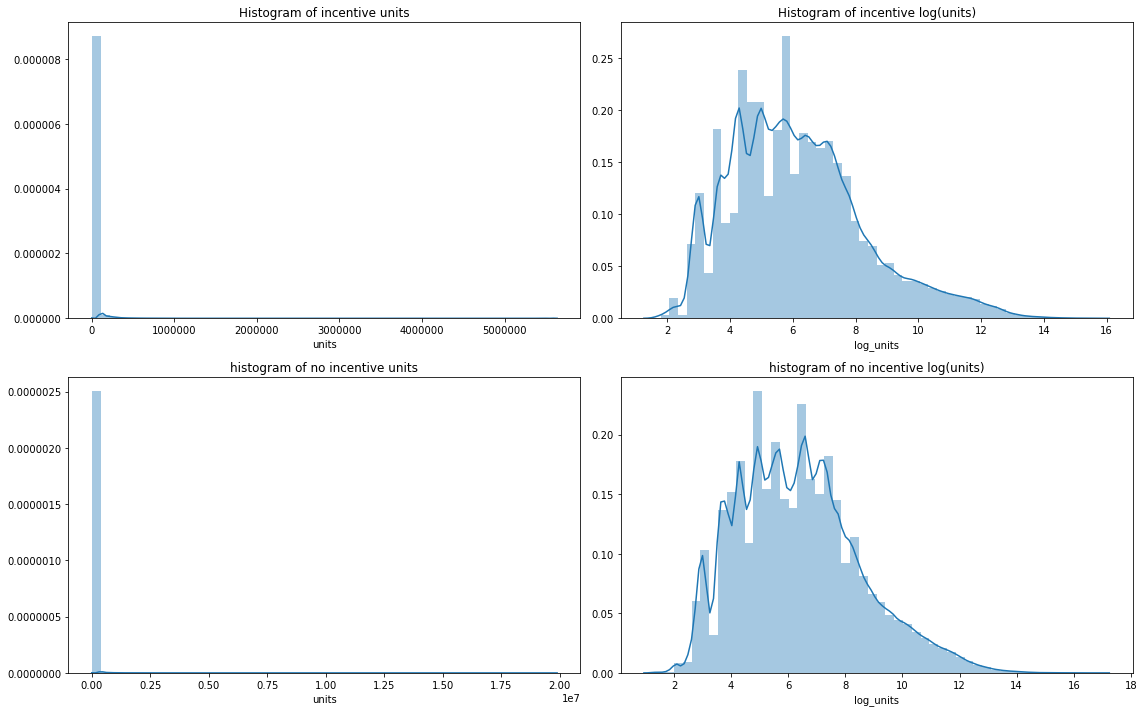

In [4]:
incentive_df = snacks_df[snacks_df['incentive']]
no_incentive_df = snacks_df[~snacks_df['incentive']]

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.distplot(incentive_df['units']).set_title('Histogram of incentive units')
plt.subplot(2, 2, 2)
sns.distplot(incentive_df['log_units']).set_title('Histogram of incentive log(units)')

plt.subplot(2, 2, 3)
sns.distplot(no_incentive_df['units']).set_title('histogram of no incentive units')
plt.subplot(2, 2, 4)
sns.distplot(no_incentive_df['log_units']).set_title('histogram of no incentive log(units)')

plt.tight_layout()

It looks like the incentive sales and not incentive sales behave very similar, the two groups seems to be a mixture of gaussians, also to notice that the scale for the distribution of incentive products seems to be larger, this can be probably an indicator that products with incentive are selling more.

What are the total sales compared between inventive vs no incentive?

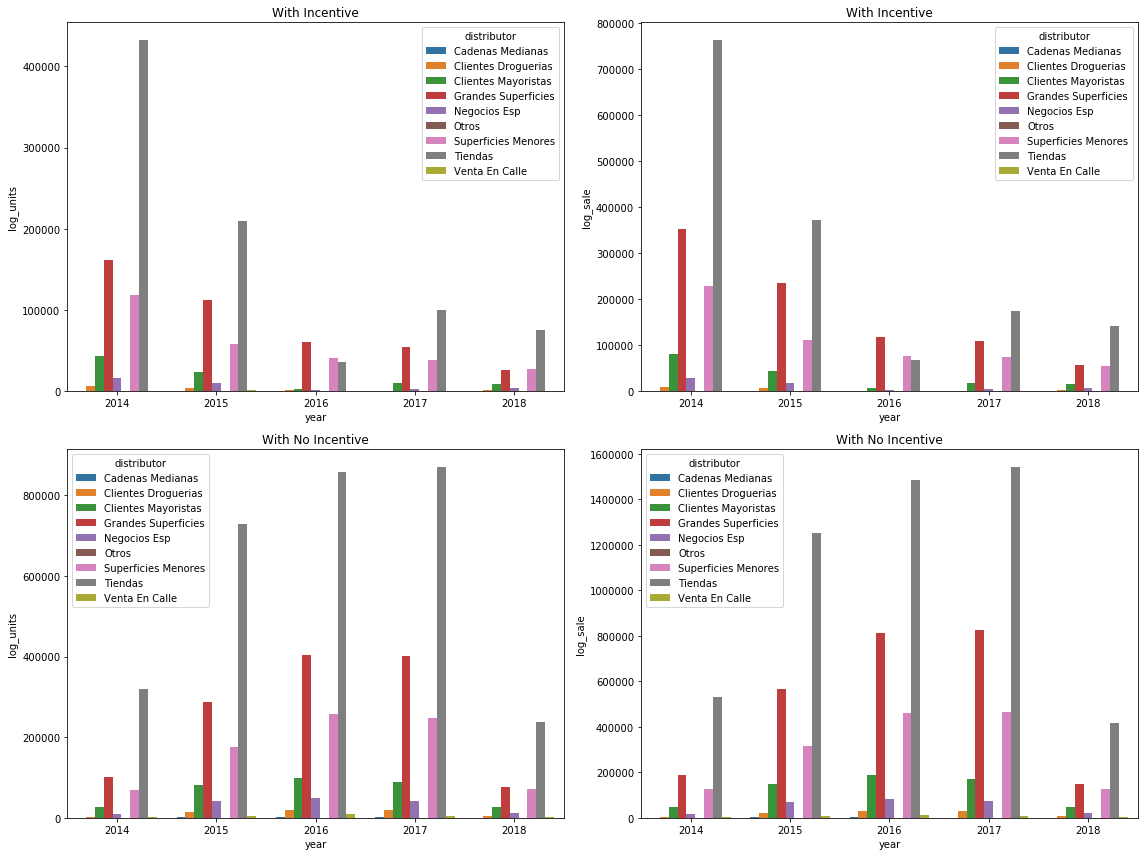

In [10]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
(
    sns.barplot(
        x='year',
        y='log_units',
        hue='distributor',
        data=incentive_df.groupby(['year', 'distributor'])['log_units'].sum().reset_index()
    ).set_title('With Incentive')
)

plt.subplot(2, 2, 2)
(
    sns.barplot(
        x='year',
        y='log_sale',
        hue='distributor',
        data=incentive_df.groupby(['year', 'distributor'])['log_sale'].sum().reset_index()
    ).set_title('With Incentive')
)

plt.subplot(2, 2, 3)
(
    sns.barplot(
        x='year',
        y='log_units',
        hue='distributor',
        data=no_incentive_df.groupby(['year', 'distributor'])['log_units'].sum().reset_index()
    ).set_title('With No Incentive')
)


plt.subplot(2, 2, 4)
(
    sns.barplot(
        x='year',
        y='log_sale',
        hue='distributor',
        data=no_incentive_df.groupby(['year', 'distributor'])['log_sale'].sum().reset_index()
    ).set_title('With No Incentive')
)

plt.tight_layout()

From the previous chart it seems like the sales with incentives are decreasing year by year, and on the other hand the salse with no incentive are increasing, this is telling us that maybe the company `SnaCo` is changing their policies to the products with incentive, this is telling us, that maybe it is not worth to make this effort because it's not increasing the sales.

How amount of the sale with incentive represents each year?

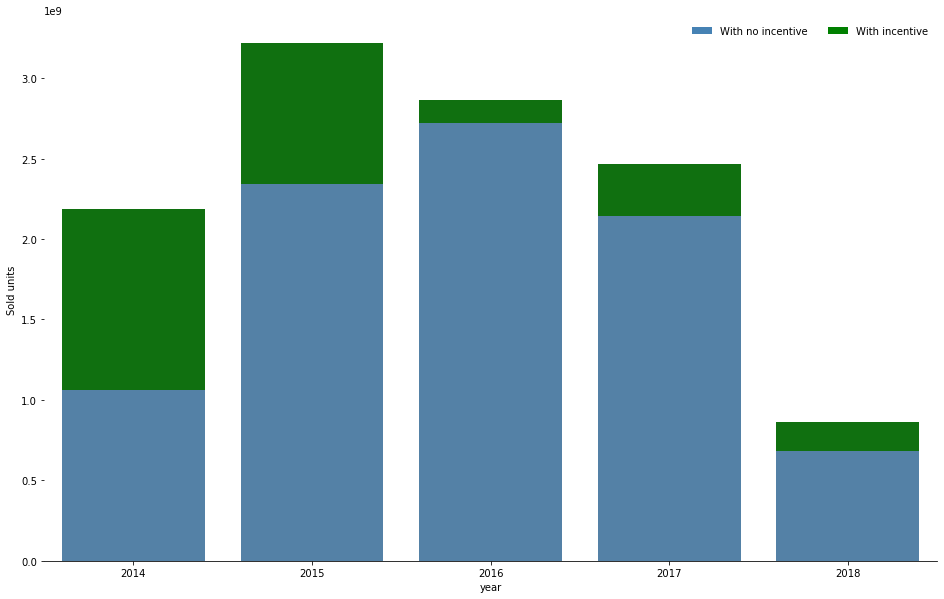

In [6]:
plt.figure(figsize=(16, 10))

sns.barplot(x='year', y='units', data=snacks_df.groupby('year')['units'].sum().reset_index(), color='green')
no_incentive_plot = sns.barplot(x='year', y='units', data=no_incentive_df.groupby('year')['units'].sum().reset_index(), color='steelblue')

topbar = plt.Rectangle((0,0), 1, 1, fc='green', edgecolor = 'none')
bottombar = plt.Rectangle((0,0), 1, 1, fc='steelblue',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['With no incentive', 'With incentive'], loc=1, ncol = 2)
l.draw_frame(False)

sns.despine(left=True)
no_incentive_plot.set_ylabel('Sold units')
no_incentive_plot.set_xlabel('year')

plt.show()

In fact this chart also evidence the decreassing amount of inventive year by year, let's make a more specific chart to evidence this more clearly

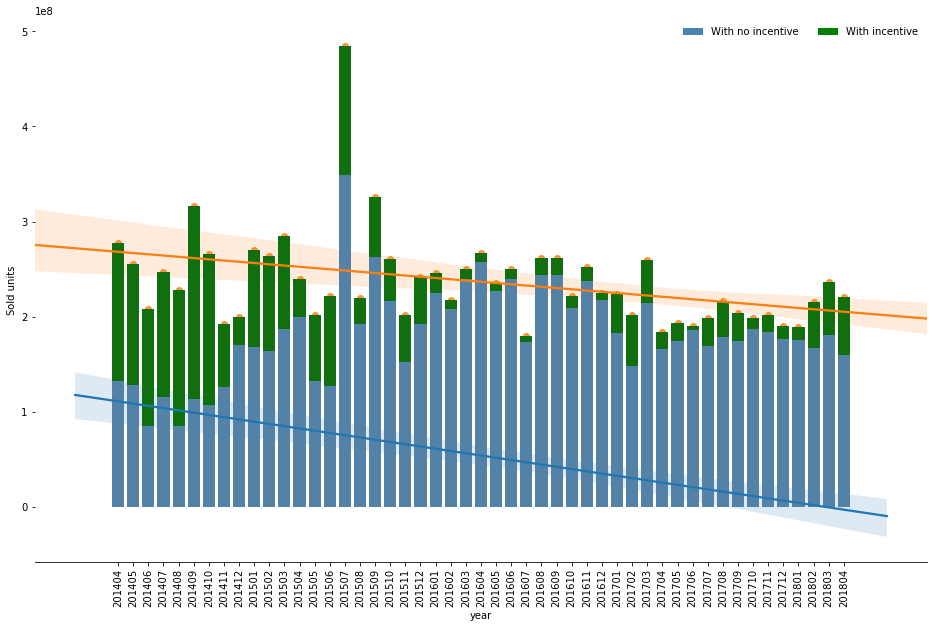

In [7]:
plt.figure(figsize=(16, 10))

chart = sns.barplot(x='yyyymm', y='units', data=snacks_df.groupby('yyyymm')['units'].sum().reset_index(), color='green')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
no_incentive_plot = sns.barplot(x='yyyymm', y='units', data=no_incentive_df.groupby('yyyymm')['units'].sum().reset_index(), color='steelblue')

df = incentive_df.groupby('yyyymm')['units'].sum().reset_index()
df['index_value'] = df.index
sns.regplot(x='index_value', y='units', data=df)

df = snacks_df.groupby('yyyymm')['units'].sum().reset_index()
df['index_value'] = df.index
sns.regplot(x='index_value', y='units', data=df)


topbar = plt.Rectangle((0,0), 1, 1, fc='green', edgecolor = 'none')
bottombar = plt.Rectangle((0,0), 1, 1, fc='steelblue',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['With no incentive', 'With incentive'], loc=1, ncol = 2)
l.draw_frame(False)

sns.despine(left=True)
no_incentive_plot.set_ylabel('Sold units')
no_incentive_plot.set_xlabel('year')

plt.show()

We can see that in general there is higher decrease of the tendency to boy sale products with incentive, altough in general temrs it seems like the tendency of unit sales are less by each month.

How are the product unit sales with incentive and without it?

In [8]:
# We do not care on devolution records so we are going to analyze units > 0
snacks_df = snacks_df[snacks_df['units'] > 0]

product_grouping = (
    snacks_df.groupby('product_id')['units']
        .count()
        .reset_index()
        .rename(columns={'units': 'count'})
        .sort_values('count', ascending=False)
)

# we are going to select only products with more than 10k records, we don't know the exact number to consider as
# a good starting point, but we are going to try 10k and see what happens and then adjust this.

products = product_grouping[product_grouping['count'] > 10000]['product_id']
print(f"Now we have {len(products)} products")

products_sample = products.sample(10)

products_df = snacks_df[snacks_df['product_id'].isin(products_sample)]
print(f"Now we have {len(products_df)} records")

Now we have 27 products
Now we have 178914 records


In [9]:
plt.figure(figsize=(16, 10))
chart = sns.lineplot(x='yyyymm', y='units', hue='product_id', estimator='sum', ci=None, data=products_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()

AttributeError: 'str' object has no attribute 'view'

<Figure size 1152x720 with 0 Axes>